# データから数値を読み取る
使用しているデータセットについては『[総務省のデータ](./サンプルデータ.ipynb)』の項を参照してください。

## データを読み込む

In [1]:
import pandas as pd

df = pd.read_csv("./z-001.csv")
df.head()

,Unnamed: 0,Unnamed: 1,平成21年度,平成22年度,平成23年度,平成24年度,平成25年度,平成26年度,平成27年度,平成28年度,平成29年度,平成30年度,令和元年度
0,2,社会保障関係費,29.8,31.2,32.7,32.7,31.8,32.8,33.7,34.4,34.6,34.4,34.7
1,3,公債費,18.9,20.3,19.8,20.9,20.9,21.4,21.3,20.6,20.9,20.6,20.0
2,4,機関費,11.9,12.5,11.7,10.6,11.8,11.7,11.8,11.4,11.5,11.9,11.8
3,5,教育費,11.7,11.9,11.7,12.1,11.6,11.7,11.7,11.7,11.8,11.8,11.9
4,6,国土保全及び開発費,12.0,11.3,10.6,10.2,10.9,10.5,9.9,10.4,10.5,10.5,10.8


# カラム名を変更する
ドキュメント：[pandas.Series.str.replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html)

`Unnamed:XX` がわかりにくいので、これらの文字列を置換します。

In [2]:
repl = lambda x: x.group(0)[::-1]
df.columns = df.columns.str.replace("Unnamed:.", "列名", regex=True)
df.head()

,列名0,列名1,平成21年度,平成22年度,平成23年度,平成24年度,平成25年度,平成26年度,平成27年度,平成28年度,平成29年度,平成30年度,令和元年度
0,2,社会保障関係費,29.8,31.2,32.7,32.7,31.8,32.8,33.7,34.4,34.6,34.4,34.7
1,3,公債費,18.9,20.3,19.8,20.9,20.9,21.4,21.3,20.6,20.9,20.6,20.0
2,4,機関費,11.9,12.5,11.7,10.6,11.8,11.7,11.8,11.4,11.5,11.9,11.8
3,5,教育費,11.7,11.9,11.7,12.1,11.6,11.7,11.7,11.7,11.8,11.8,11.9
4,6,国土保全及び開発費,12.0,11.3,10.6,10.2,10.9,10.5,9.9,10.4,10.5,10.5,10.8


In [3]:
# 列名1の列はインデックスにして削除する
df.index = df["列名1"]
df = df.drop(["列名1"], axis=1)
df.head()

,列名0,平成21年度,平成22年度,平成23年度,平成24年度,平成25年度,平成26年度,平成27年度,平成28年度,平成29年度,平成30年度,令和元年度
列名1,,,,,,,,,,,,
社会保障関係費,2,29.8,31.2,32.7,32.7,31.8,32.8,33.7,34.4,34.6,34.4,34.7
公債費,3,18.9,20.3,19.8,20.9,20.9,21.4,21.3,20.6,20.9,20.6,20.0
機関費,4,11.9,12.5,11.7,10.6,11.8,11.7,11.8,11.4,11.5,11.9,11.8
教育費,5,11.7,11.9,11.7,12.1,11.6,11.7,11.7,11.7,11.8,11.8,11.9
国土保全及び開発費,6,12.0,11.3,10.6,10.2,10.9,10.5,9.9,10.4,10.5,10.5,10.8


# 列名を確認する
想定したデータ型になっているかを確認します。

In [4]:
df.dtypes

列名0         int64
平成21年度    float64
平成22年度    float64
平成23年度    float64
平成24年度    float64
平成25年度    float64
平成26年度    float64
平成27年度    float64
平成28年度    float64
平成29年度    float64
平成30年度    float64
令和元年度     float64
dtype: object

# 年度ごとに平均・中央値などを求めてみる
```{hint}
- [pandas.DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)
- [pandas.DataFrame.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```

数値として読み取れる列を選択して、その平均や中央値を求めてみます。"list of functions and/or function names, e.g. [np.sum, 'mean']"ということで関数名や関数を指定すると、列ごとにそれを実行します。


In [5]:
df.select_dtypes("number").agg(["mean", "median", "min", "max", "sum", "var", "std"])

,列名0,平成21年度,平成22年度,平成23年度,平成24年度,平成25年度,平成26年度,平成27年度,平成28年度,平成29年度,平成30年度,令和元年度
mean,4.500000,15.700000,15.90000,15.983333,15.783333,15.683333,15.816667,15.883333,15.866667,15.933333,15.900000,15.933333
median,4.500000,11.950000,12.20000,11.700000,11.350000,11.700000,11.700000,11.750000,11.550000,11.650000,11.850000,11.850000
min,2.000000,9.900000,8.20000,9.400000,8.200000,7.100000,6.800000,6.900000,6.700000,6.300000,6.200000,6.400000
max,7.000000,29.800000,31.20000,32.700000,32.700000,31.800000,32.800000,33.700000,34.400000,34.600000,34.400000,34.700000
sum,27.000000,94.200000,95.40000,95.900000,94.700000,94.100000,94.900000,95.300000,95.200000,95.600000,95.400000,95.600000
var,3.500000,57.364000,72.29200,80.605667,88.293667,83.053667,92.613667,99.489667,103.422667,106.434667,104.080000,103.862667
std,1.870829,7.573903,8.50247,8.978066,9.396471,9.113378,9.623599,9.974451,10.169694,10.316718,10.201961,10.191303


# 年度ごとの変化を可視化する
seabornを用いてデータをプロットしてみます。平成と令和が含まれる列のみを対象に抽出してプロットします。japanize_matplotlibにより日本語を表示できるようにしています。列名は `pandas.DataFrame.filter`でフィルタリングしています。

```{hint}
[seaborn](https://seaborn.pydata.org/)
```

列名1,社会保障関係費,公債費,機関費,教育費,国土保全及び開発費,産業経済費
平成21年度,29.8,18.9,11.9,11.7,12.0,9.9
平成22年度,31.2,20.3,12.5,11.9,11.3,8.2
平成23年度,32.7,19.8,11.7,11.7,10.6,9.4
平成24年度,32.7,20.9,10.6,12.1,10.2,8.2
平成25年度,31.8,20.9,11.8,11.6,10.9,7.1


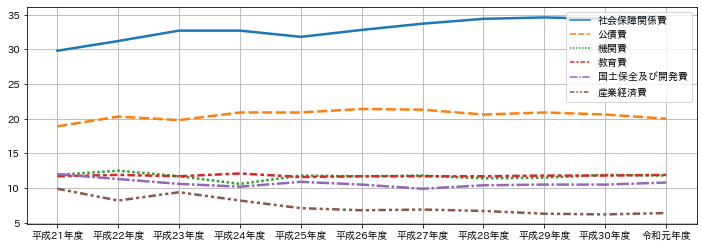

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

data = df.filter(regex="(平成|令和).+", axis=1).T
plt.figure(figsize=(12, 4))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.grid()
plt.legend()

data.head()